## Things to try still
* Is it possible to subsample tips from the tree within 
ipcoal demography to replicate sampling only some lineages within the local community?

In [83]:
%load_ext autoreload
%autoreload 2
import toytree
import ipcoal
import numpy as np

import BCI

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
tre = toytree.rtree.unittree(8, treeheight=1e6)
tre.draw(tree_style='p');

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="260.0px" viewBox="0 0 350.0 260.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t8341c0389d844229af33077c33c72c8f"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 r0 r1 r2 r3 r4 r5 r6 r7 0 500000 1000000

## Unittree with constant Ne of 1e5

In [130]:
outphy = "unittree-Ne1e5-10samples.phy"
model = ipcoal.Model(tre, Ne=1e5, recomb=0, mut=1e-7, nsamples=10)
model.sim_loci(nloci=1, nsites=500)
model.write_concat_to_phylip(outdir=".", name=outphy)
BCI.phylip_to_fasta(outphy, verbose=True)

wrote concat locus (80 x 500bp) to /home/isaac/proj/IMEMEBA/unittree-Ne1e5-10samples.phy
unittree-Ne1e5-10samples.fasta


[69, 35, 24, 20, 18, 13, 13, 10, 8, 8, 6, 6, 6, 5, 5, 5, 4, 3, 2, 2]


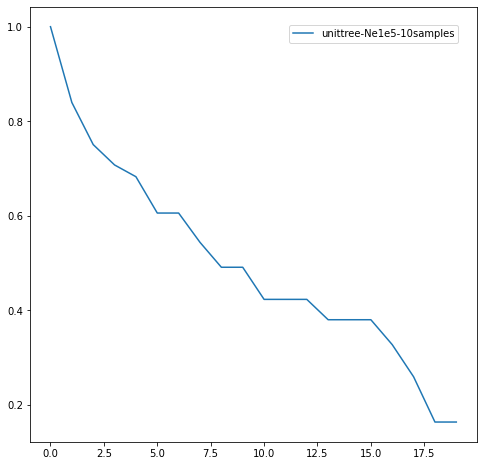

In [147]:
bci = BCI.BCI(data="./unittree-Ne1e5-10samples.fasta")
bci.run(verbose=True)
fig, ax = bci.plot()

## Unittree with lognormal NE and ancestral Ne of 1e5

In [144]:
outphy = "unittree-NeLognormal-5samples.phy"

np.random.lognormal(12, sigma=2, size=8)
tips = tre.get_tip_labels()
# Dict {tip_name:Ne}
Nes = {x:np.round(y) for x, y in zip(tips, np.random.lognormal(13, sigma=2, size=len(tips)))}
print(Nes)
# Set Nes for the tips
tre = tre.set_node_values("Ne", Nes, default=1e5)
# Set Ne to None here to honor the Ne values on the nodes of the tree
model = ipcoal.Model(tre, Ne=None, recomb=0, mut=1e-7, nsamples=10)
model.sim_loci(nloci=1, nsites=500)
model.write_concat_to_phylip(outdir=".", name=outphy)
BCI.phylip_to_fasta(outphy, verbose=True)


{'r0': 65598.0, 'r1': 539446.0, 'r2': 14297079.0, 'r3': 1182791.0, 'r4': 2141686.0, 'r5': 208070.0, 'r6': 1020545.0, 'r7': 75713.0}
wrote concat locus (80 x 500bp) to /home/isaac/proj/IMEMEBA/unittree-NeLognormal-5samples.phy
unittree-NeLognormal-5samples.fasta


In [162]:
bci2 = BCI.BCI(data="./unittree-NeLognormal-5samples.fasta")
bci2.run(verbose=True)

[73, 58, 51, 47, 36, 33, 28, 25, 19, 19, 19, 12, 10, 6, 5, 4, 3, 1, 1, 1]


## Plot them both together

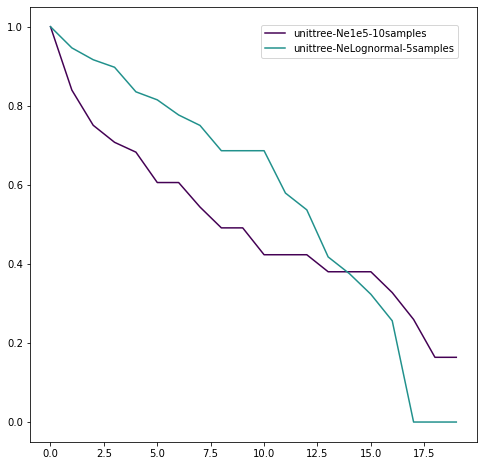

In [161]:
fix, ax = BCI.plot_multi([bci, bci2], log=True, normalize=True, cmap="viridis")

## Simulate trees with variable numbers of tips and demographic models with variable Ne

wrote concat locus (80 x 500bp) to /home/isaac/proj/IMEMEBA/t8-lnFalse-Ne100000.0-lnFalse.phy


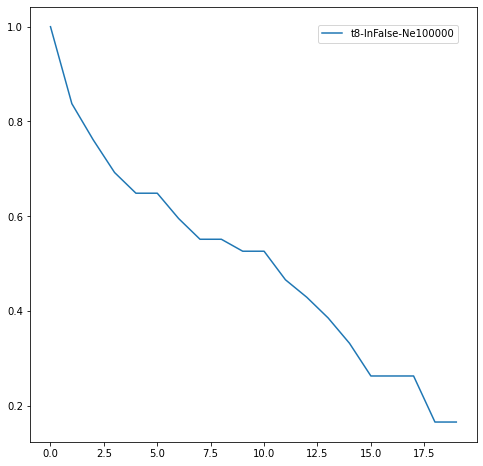

In [196]:
def sim_bci(ntips=8, treeheight=1e6, Ne=1e5, Ne_lognormal=False, verbose=False):
    """
    ntips - number of leaves on the simulated tree
    treeheight - Age of MRCA
    Ne_anc - Ancestral Ne at all the nodes
    Ne - Ne at the tips, can be a fixed value or 'lognormal' to indicate sampled from a lognormal distribution
    """
    tre = toytree.rtree.unittree(ntips, treeheight=treeheight)

    if Ne_lognormal:
        np.random.lognormal(12, sigma=2, size=8)
        tips = tre.get_tip_labels()
        # Dict {tip_name:Ne}
        Nes = {x:np.round(y) for x, y in zip(tips, np.random.lognormal(13, sigma=2, size=len(tips)))}
        if verbose: print(Nes)
        # Set Nes for the tips
        tre = tre.set_node_values("Ne", Nes, default=Ne)
        # Set Ne to None here to honor the Ne values on the nodes of the tree
        Ne_anc = Ne
        Ne = None
    else:
        # Use the same Ne for all nodes in the tree
        Ne_anc = Ne

    model = ipcoal.Model(tre, Ne=Ne, recomb=0, mut=1e-7, nsamples=10)
    model.sim_loci(nloci=1, nsites=500)
    # Write the sequence data to a file and conver to fasta
    outphy = f"t{ntips}-ln{Ne_lognormal}-Ne{str(Ne_anc)}-ln{Ne_lognormal}.phy"
    model.write_concat_to_phylip(outdir=".", name=outphy)
    fasta = BCI.phylip_to_fasta(outphy, verbose=verbose)
    bci = BCI.BCI(data=fasta)
    bci.run(verbose=verbose)
    return bci

bci = sim_bci(verbose=False)
fix, ax = bci.plot()

## Same demography, constant Ne, same number of tips (20)

wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnFalse-Ne100000.0-lnFalse.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnFalse-Ne100000.0-lnFalse.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnFalse-Ne100000.0-lnFalse.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnFalse-Ne100000.0-lnFalse.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnFalse-Ne100000.0-lnFalse.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnFalse-Ne100000.0-lnFalse.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnFalse-Ne100000.0-lnFalse.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnFalse-Ne100000.0-lnFalse.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnFalse-Ne100000.0-lnFalse.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnFalse-Ne100000.0-lnFalse.phy


(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

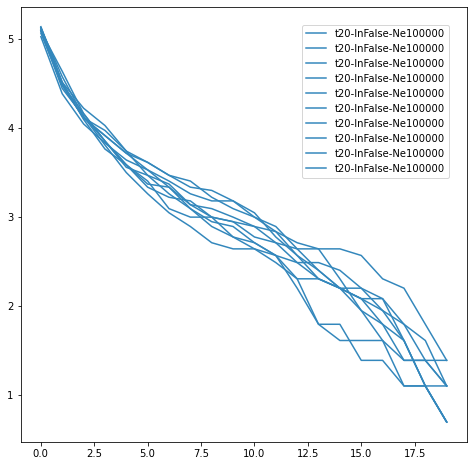

In [183]:
bcis = [sim_bci(ntips=20) for x in range(10)]
BCI.plot_multi(bcis)

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

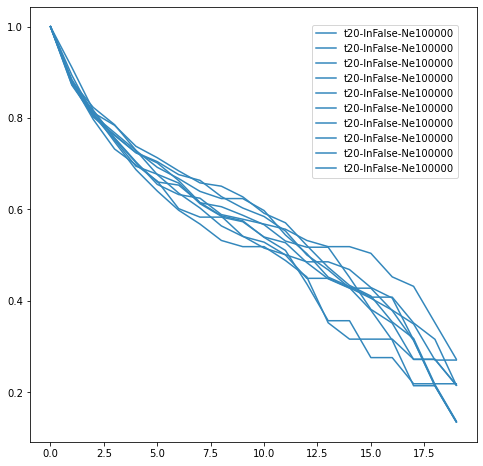

In [184]:
BCI.plot_multi(bcis, normalize=True)

## Same demography, lognormal Ne, same number of tips (20)

wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne100000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne100000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne100000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne100000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne100000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne100000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne100000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne100000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne100000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne100000.0-lnTrue.phy


(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

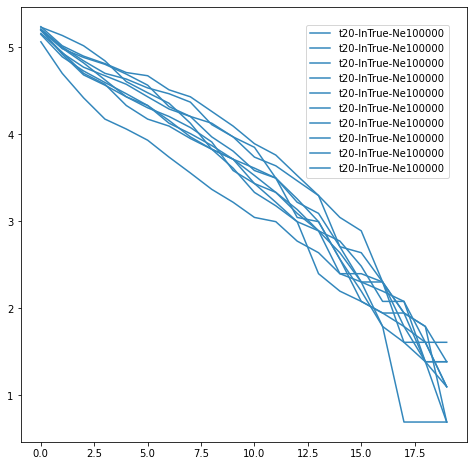

In [197]:
bcis = [sim_bci(ntips=20, Ne_lognormal=True) for x in range(10)]
BCI.plot_multi(bcis)

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

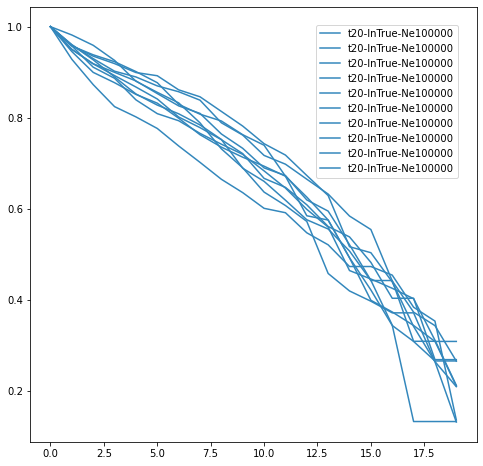

In [198]:
BCI.plot_multi(bcis, normalize=True)

## Same demography, constant Ne, but different numbers of tips from 10 - 100

wrote concat locus (100 x 500bp) to /home/isaac/proj/IMEMEBA/tips_10-Ne_100000.0-lognorm_False.phy
tips_10-Ne_100000.0-lognorm_False.fasta
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/tips_20-Ne_100000.0-lognorm_False.phy
tips_20-Ne_100000.0-lognorm_False.fasta
wrote concat locus (300 x 500bp) to /home/isaac/proj/IMEMEBA/tips_30-Ne_100000.0-lognorm_False.phy
tips_30-Ne_100000.0-lognorm_False.fasta
wrote concat locus (400 x 500bp) to /home/isaac/proj/IMEMEBA/tips_40-Ne_100000.0-lognorm_False.phy
tips_40-Ne_100000.0-lognorm_False.fasta
wrote concat locus (500 x 500bp) to /home/isaac/proj/IMEMEBA/tips_50-Ne_100000.0-lognorm_False.phy
tips_50-Ne_100000.0-lognorm_False.fasta
wrote concat locus (600 x 500bp) to /home/isaac/proj/IMEMEBA/tips_60-Ne_100000.0-lognorm_False.phy
tips_60-Ne_100000.0-lognorm_False.fasta
wrote concat locus (700 x 500bp) to /home/isaac/proj/IMEMEBA/tips_70-Ne_100000.0-lognorm_False.phy
tips_70-Ne_100000.0-lognorm_False.fasta
wrote concat locus (800 x 5

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

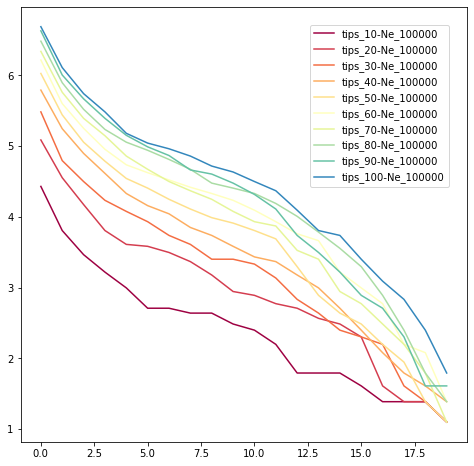

In [168]:
bcis = [sim_bci(ntips=int(x)) for x in np.linspace(10, 100, 10)]
BCI.plot_multi(bcis)

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

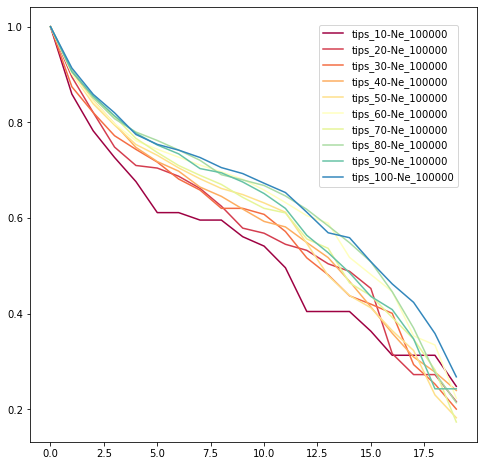

In [176]:
BCI.plot_multi(bcis, normalize=True)

## Same demography, lognormal Ne, but different numbers of tips from 10 - 100

wrote concat locus (100 x 500bp) to /home/isaac/proj/IMEMEBA/t10-lnTrue-NeNone-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-NeNone-lnTrue.phy
wrote concat locus (300 x 500bp) to /home/isaac/proj/IMEMEBA/t30-lnTrue-NeNone-lnTrue.phy
wrote concat locus (400 x 500bp) to /home/isaac/proj/IMEMEBA/t40-lnTrue-NeNone-lnTrue.phy
wrote concat locus (500 x 500bp) to /home/isaac/proj/IMEMEBA/t50-lnTrue-NeNone-lnTrue.phy
wrote concat locus (600 x 500bp) to /home/isaac/proj/IMEMEBA/t60-lnTrue-NeNone-lnTrue.phy
wrote concat locus (700 x 500bp) to /home/isaac/proj/IMEMEBA/t70-lnTrue-NeNone-lnTrue.phy
wrote concat locus (800 x 500bp) to /home/isaac/proj/IMEMEBA/t80-lnTrue-NeNone-lnTrue.phy
wrote concat locus (900 x 500bp) to /home/isaac/proj/IMEMEBA/t90-lnTrue-NeNone-lnTrue.phy
wrote concat locus (1000 x 500bp) to /home/isaac/proj/IMEMEBA/t100-lnTrue-NeNone-lnTrue.phy


(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

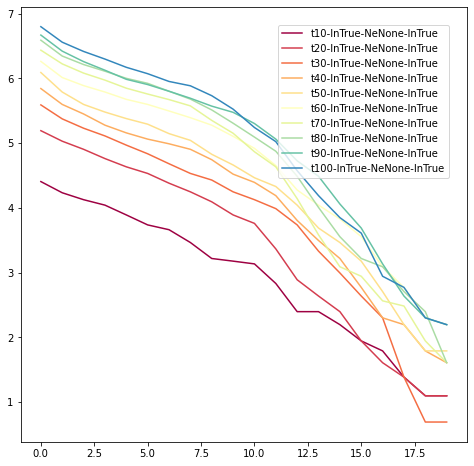

In [191]:
bcis = [sim_bci(ntips=int(x), Ne_lognormal=True) for x in np.linspace(10, 100, 10)]
BCI.plot_multi(bcis)

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

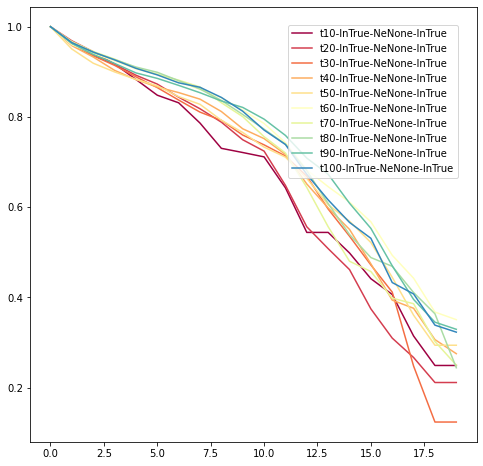

In [192]:
BCI.plot_multi(bcis, normalize=True)

## Same demography, lognormal Ne, 20 tips, varying Ne

wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne10000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne120000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne230000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne340000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne450000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne560000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne670000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne780000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne890000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne1000000.0-lnTrue.phy


(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

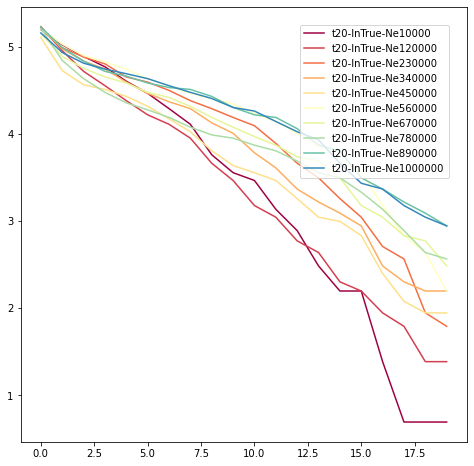

In [202]:
bcis = [sim_bci(ntips=20, Ne_lognormal=True, Ne=x) for x in np.linspace(1e4, 1e6, 10)]
BCI.plot_multi(bcis)

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

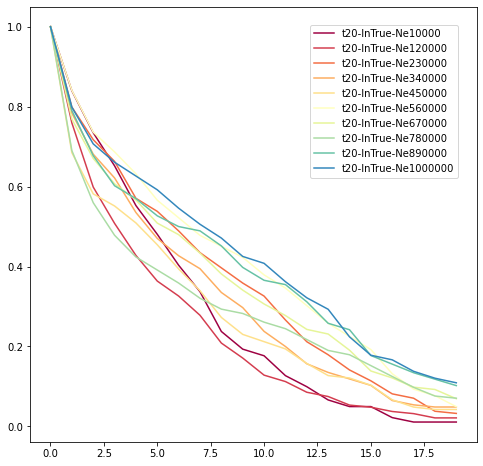

In [204]:
BCI.plot_multi(bcis, log=False, normalize=True)

In [ ]:
### Lets add more replicates to that

wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne10000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne120000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne230000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne340000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne450000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne560000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne670000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne780000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne890000.0-lnTrue.phy
wrote concat locus (200 x 500bp) to /home/isaac/proj/IMEMEBA/t20-lnTrue-Ne1000000.0-lnTrue.phy


(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

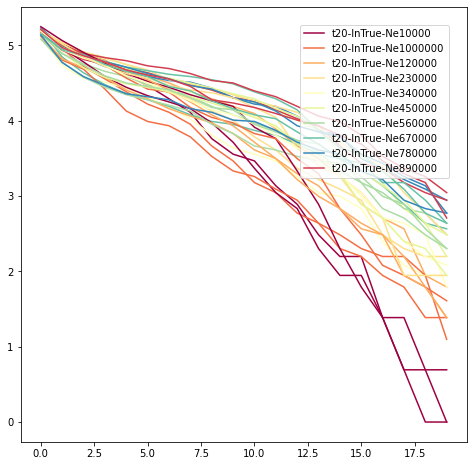

In [222]:
bcis.extend([sim_bci(ntips=20, Ne_lognormal=True, Ne=x) for x in np.linspace(1e4, 1e6, 10)])
BCI.plot_multi(bcis)

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

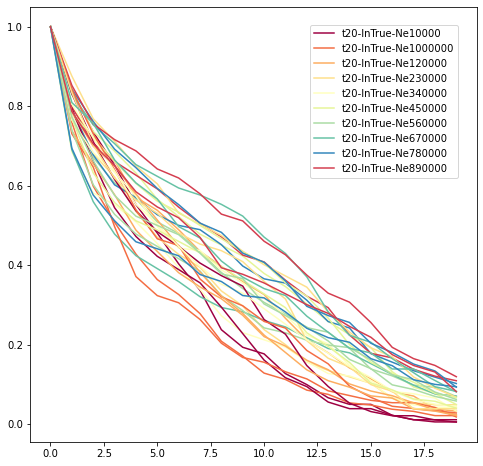

In [223]:
BCI.plot_multi(bcis, log=False, normalize=True)

# Prototyping

In [226]:
tips = tre.get_tip_labels()
# Dict {tip_name:Ne}
samps = [5]*8
Nes = {x:np.round(y) for x, y in zip(tips, samps)}
Nes

{'r0': 5, 'r1': 5, 'r2': 5, 'r3': 5, 'r4': 5, 'r5': 5, 'r6': 5, 'r7': 5}